<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Заменим-пропуски" data-toc-modified-id="Заменим-пропуски-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Заменим пропуски</a></span></li><li><span><a href="#Удалим-столбцы-CustomerId,-RowNumber,-Surname" data-toc-modified-id="Удалим-столбцы-CustomerId,-RowNumber,-Surname-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Удалим столбцы CustomerId, RowNumber, Surname</a></span></li><li><span><a href="#Преобразуем-методом-OHE-Geography-и----Gender" data-toc-modified-id="Преобразуем-методом-OHE-Geography-и----Gender-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Преобразуем методом OHE Geography и    Gender</a></span></li><li><span><a href="#Масштабируем-численные-признаки-выборок-для-выравнивания-весов" data-toc-modified-id="Масштабируем-численные-признаки-выборок-для-выравнивания-весов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Масштабируем численные признаки выборок для выравнивания весов</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-данных" data-toc-modified-id="Баланс-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс данных</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

###### Инструкция по выполнению проекта
- Загрузите и подготовьте данные. Поясните порядок действий.
- Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.
- Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.
- Проведите финальное тестирование.
###### Описание данных
- Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»). Скачать датасет
###### Признаки
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
###### Целевой признак
- Exited — факт ухода клиента

## Подготовка данных

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('/datasets/Churn.csv')

In [15]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [17]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

###### Вывод
- Данные состоят из 10000 строк и 14 столбцов
- Целевой признак для нашей задачи – Exited, т.е. модель, которую мы попытаемся построить, будет предсказывать значение 1 если клиент уйдет или 0 если клиент останется.
- Geography, Gender — преобразовать методом One hot encoder
- Так же нужно обработать пропуски в столбце Tenure.
- удалим 'CustomerId', RowNumber и 'Surname', так как они бесполезны для прогнозирования Exited
- CreditScore, Age, Tenur, Balance, NumOfProducts, EstimatedSalary — масштабируем

# Предобработка данных

### Заменим пропуски

- Заменим пропуски в столбце Tenure на случайные значения

In [18]:
#Зафиксируем последовательность случайнеых чисел
np.random.seed(12345)
#Заполняем пропуски
data.loc[data['Tenure'].isna(), 'Tenure'] = pd.Series(np.random.randint(0, 11, len(data)))
#Посмотрим распределение после заполнения пропусков
data['Tenure'].value_counts(normalize=True).round(2)

2.0     0.10
1.0     0.10
3.0     0.10
8.0     0.10
5.0     0.10
4.0     0.10
7.0     0.10
6.0     0.10
9.0     0.10
10.0    0.05
0.0     0.05
Name: Tenure, dtype: float64

### Удалим столбцы CustomerId, RowNumber, Surname

In [19]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [20]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


### Преобразуем методом OHE Geography и	Gender

In [21]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
features=data.drop(['Exited'],axis=1)
target=data['Exited']

In [23]:
target = data['Exited']
features = data.drop('Exited', axis=1)

train_features, valid_features, train_target, valid_target = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=12345)
valid_features, test_features, valid_target, test_target = train_test_split(valid_features, valid_target, test_size=0.5, 
                                                                              random_state=12345 )
print(train_features.shape, valid_features.shape, test_features.shape)
print(train_target.shape, valid_target.shape, test_target.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


### Масштабируем численные признаки выборок для выравнивания весов

In [24]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(train_features[numeric]) 
train_features[numeric] = scaler.transform(train_features[numeric])
valid_features[numeric] = scaler.transform(valid_features[numeric])
test_features[numeric] = scaler.transform(test_features[numeric])
train_features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.019194,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.019194,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.701449,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.330937,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.045578,1.140475,-0.891560,0,0,1.524268,1,0,0


## Исследование задачи

### Баланс данных

0    7963
1    2037
Name: Exited, dtype: int64

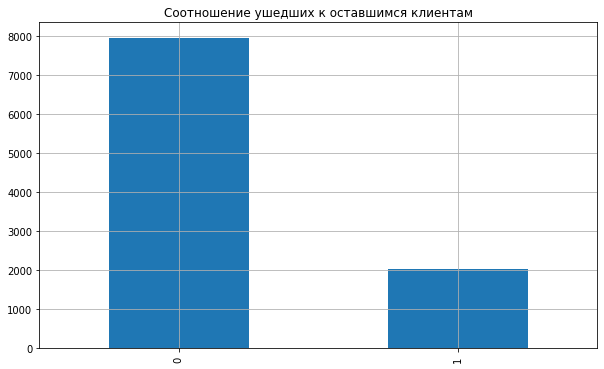

In [25]:
data['Exited'].value_counts().plot(kind='bar', grid=True,figsize=(10,6),title='Соотношение ушедших к оставшимся клиентам')
data['Exited'].value_counts()

- Соотношение оттока и тех кто остался 1:4. Вывод: такое соотношение говорит, что присутствует дисбаланс в данных.

###### Обучим модели случайного дерева с перебором глубины, найдем гиперпараметры с наибольшей метрикой f1.

In [26]:
f1_best = 0
depth_best = 0
for depth in range(1, 7):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features, train_target)
    prediction = model.predict(valid_features)
    f1 = f1_score(valid_target, prediction)
    if f1>f1_best:
        f1_best=f1
        depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

Max depth 6 F1-score 0.5696969696969697


###### Проведем оценку accuracy, precision, recall, F1, AUC-ROC на полученных гиперпараметрах

In [27]:
model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.858
Precision 0.7768595041322314
Recall 0.44976076555023925
F1 0.5696969696969697
AUC-ROC 0.8164631712023421


###### Обучим модель случайного леса с перебором гиперпараментров, которые дают наибольшую метрику f1

In [28]:
f1_best = 0
estim_best = 0
depth_best = 0

for estim in range(1, 15):
    for depth in range(8, 14):
        model = RandomForestClassifier(n_estimators=estim, random_state=12345, max_depth=depth)
        model.fit(train_features, train_target)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth
            
            
print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

n_estimators = 10 Max depth 13 F1-score 0.6011730205278591


###### Проведем оценку accuracy, precision, recall, F1, AUC-ROC на полученных гиперпараметрах

In [29]:
model = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best)
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.851
Precision 0.7419354838709677
Recall 0.44019138755980863
F1 0.5525525525525525
AUC-ROC 0.8215805503299681


###### Обучим модель регрессии с перебором гиперпараментров, которые дают наибольшую метрику f1

In [30]:
model =  LogisticRegression()
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.8025
Precision 0.5657142857142857
Recall 0.23684210526315788
F1 0.33389544688026984
AUC-ROC 0.7587013591904137


###### Вывод
- Из-за несбалансированности данных, все модели имеют recall ниже, чем percision, это влияет на F-меру. Модель случайного леса имеет метрику близкую к необходимой

## Борьба с дисбалансом

###### Обучение моделей с параметром автоматической регулировки весов.

In [31]:
# Модель случайного дерева
# Подбор гиперпараметров
f1_best = 0
depth_best = 0
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(train_features, train_target)
    prediction = model.predict(valid_features)
    f1 = f1_score(valid_target, prediction)
    if f1>f1_best:
        f1_best=f1
        depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

Max depth 5 F1-score 0.5963791267305644


In [32]:
model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.799
Precision 0.5198019801980198
Recall 0.5023923444976076
F1 0.510948905109489
AUC-ROC 0.6898813808455169


In [33]:
f1_best = 0
estim_best = 0
depth_best = 0

for estim in range(43, 47):
    for depth in range(10, 12):
        model = RandomForestClassifier(n_estimators=estim, random_state=12345, max_depth=depth, class_weight='balanced')
        model.fit(train_features, train_target)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth
            
            
print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

n_estimators = 45 Max depth 10 F1-score 0.6179640718562874


In [34]:
model = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.8395
Precision 0.6185819070904646
Recall 0.6052631578947368
F1 0.6118500604594921
AUC-ROC 0.8512436562040662


In [35]:
model =  LogisticRegression(class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.6995
Precision 0.3784860557768924
Recall 0.6818181818181818
F1 0.48676345004269855
AUC-ROC 0.7636176120107186


###### После регулировки весов F1 мера стала лучше

###### Применим Upsampling, увеличим количество колличество target=0

In [36]:
def upsampling (features,target,repeat):
    #Разделяем выборку по значениям целевой функции
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
    
    #Увеличиваем и соединяем обратно
    upsampling_features=pd.concat([features_null]+[features_one]*repeat)
    upsampling_target=pd.concat([target_null]+[target_one]*repeat)
    
    # Перемешиваем
    upsampling_features,upsampling_target=shuffle(upsampling_features,upsampling_target,random_state=12345)
    
    return upsampling_features,upsampling_target

In [37]:
features_balance,target_balance=upsampling(train_features,train_target,4)

In [38]:
# Модель случайного дерева
# Подбор гиперпараметров
f1_best = 0
depth_best = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_balance,target_balance)
    prediction = model.predict(valid_features)
    f1 = f1_score(valid_target, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

Max depth 5 F1-score 0.5963791267305644


In [39]:
model = DecisionTreeClassifier(random_state=12345, max_depth=depth_best)
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))
fpr_tree, tpr_tree, thresholds = roc_curve(valid_target, probabilities_valid)

Accuracy 0.8105
Precision 0.5374280230326296
Recall 0.6698564593301436
F1 0.5963791267305644
AUC-ROC 0.8310244134068074


In [40]:
# Модель случайного леса
# Подбор гиперпараметров
f1_best = 0
estim_best = 0
depth_best = 0

for estim in range(44, 60):
    for depth in range(7, 9):
        model = RandomForestClassifier(n_estimators=estim, random_state=12345, max_depth=depth)
        model.fit(features_balance,target_balance)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth
            
            
print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

n_estimators = 46 Max depth 8 F1-score 0.6329896907216496


In [41]:
model = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=12345)
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))
fpr_forest, tpr_forest, thresholds = roc_curve(valid_target, probabilities_valid)

Accuracy 0.822
Precision 0.5561594202898551
Recall 0.7344497607655502
F1 0.6329896907216496
AUC-ROC 0.8549244188508278


In [42]:
model =  LogisticRegression(class_weight='balanced')
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))
fpr_log, tpr_log, thresholds = roc_curve(valid_target, probabilities_valid)

Accuracy 0.6995
Precision 0.3784860557768924
Recall 0.6818181818181818
F1 0.48676345004269855
AUC-ROC 0.7635919041368506


###### Изобразим на графике auc-roc

<Figure size 432x288 with 0 Axes>

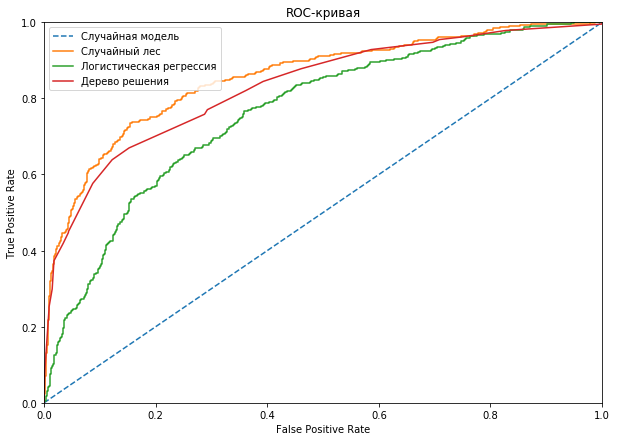

In [43]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_forest,tpr_forest)
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

###### При регулировке весов модель случайного леса показала себя лучше остальных. Так же метрика AUC-ROC Случайного леса лучше остальных

## Тестирование модели

###### Обучим финальную модель после регулировки весов

In [44]:
model_final = RandomForestClassifier(n_estimators=159, max_depth=11, random_state=12345, class_weight='balanced')
model_final.fit(train_features, train_target)
prediction = model_final.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model_final.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.8435
Precision 0.6415094339622641
Recall 0.569377990430622
F1 0.603295310519645
AUC-ROC 0.8494607395399196


###### Проверим на адекватность модель

In [45]:
#Создаем константную модель
target_predict_constant = pd.Series([0]*len(valid_target))
target_predict_constant.value_counts()

0    2000
dtype: int64

In [46]:
#Сравним показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(valid_target, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(valid_target, prediction))

accuracy_score константой модели: 0.791
accuracy_score финальной модели: 0.8435


In [47]:
#Сравним AUC-ROC, остальные метрики не работают на константной модели.
print('AUC-ROC константой модели:', roc_auc_score(valid_target, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(valid_target, probabilities_valid))

AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.8494607395399196


###### Метрики финальной модели, выше константной. Модель прошла проверку на адекватность

###### Тестируем модель

In [48]:
model_final
prediction = model_final.predict(test_features)
print('Accuracy', accuracy_score(test_target, prediction))
print('Precision', precision_score(test_target, prediction))
print('Recall', recall_score(test_target, prediction))
print('F1', f1_score(test_target, prediction))
probabilities_valid = model_final.predict_proba(test_features)[:, 1]
print("AUC-ROC", roc_auc_score(test_target, probabilities_valid))
fpr, tpr, thresholds = roc_curve(test_target, probabilities_valid)

Accuracy 0.841
Precision 0.6454293628808865
Recall 0.5508274231678487
F1 0.5943877551020409
AUC-ROC 0.8573075429751854


<Figure size 432x288 with 0 Axes>

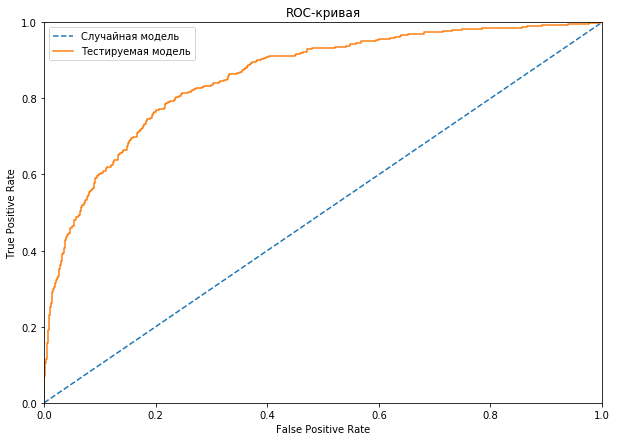

In [49]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Тестируемая модель'),
           loc= 'upper left') 
plt.show()

###### Вывод

- Модели со сбалансированными данными путем увеличения количества недостающих классов показали себя лучше других видов баланса и несбалансированных моделей. Финальная модель на тестовой выборке достигла заданного порога и показывает адекватные результаты (AUC-ROC 0.85) Модель с большой вероятностью предскажет уход клиента из банка за счет высокой точности (0.641) Модель находит большую часть ушедших клиентов на тестовой выборке (полнота = 0.55)

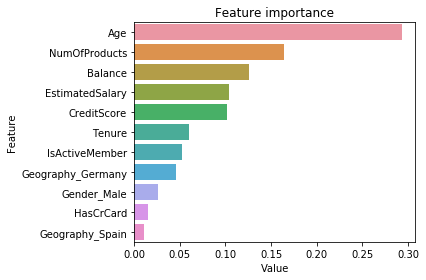

In [53]:
import seaborn as sns
feature_importance = model_final.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(feature_importance, features.columns)), columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature importance')
plt.tight_layout()
plt.show();